In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import ttest_ind
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\AP\Desktop\states_all.csv')

In [3]:
# fill nulls using interpolate because data is time series

fill_list = ['ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G']

for col in fill_list:
    df.loc[:, col].interpolate(inplace=True)

# fill large nulls with mean

df["AVG_MATH_4_SCORE"] = df.AVG_MATH_4_SCORE.fillna(df.AVG_MATH_4_SCORE.mean())
df["AVG_READING_4_SCORE"] = df.AVG_READING_4_SCORE.fillna(df.AVG_READING_4_SCORE.mean())
df["AVG_MATH_8_SCORE"] = df.AVG_MATH_8_SCORE.fillna(df.AVG_MATH_8_SCORE.mean())
df["AVG_READING_8_SCORE"] = df.AVG_READING_8_SCORE.fillna(df.AVG_READING_8_SCORE.mean())

# drop nulls after interpolation and mean
df.dropna(inplace=True)

In [ ]:
df.head(2)

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.isnull().sum()/df.isnull().count()

In [ ]:
df.nunique()

In [ ]:
df.describe()

-----------------------

1. Create a new score variable from the weighted averages of all score variables in the datasets. Notice that the number of students in the 4th grade isn't the same as the number of students in the 8th grade. So, you should appropriately weigh the scores!.

In [4]:
# i did not see a big enough difference between the number of 4th and 8th graders. both grades are treated same.

df["overall_score"] = (df["GRADES_4_G"] * (df["AVG_MATH_4_SCORE"] + df["AVG_READING_4_SCORE"]) + df["GRADES_8_G"]
                      * (df["AVG_MATH_8_SCORE"] + df["AVG_READING_8_SCORE"]))/(df["GRADES_4_G"] + df["GRADES_8_G"])

-------------------

2. What are the correlations between this newly created score variable and the expenditure types? Which 1 of the expenditure types is more correlated than the others?

In [5]:
df[["overall_score", "TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE",
              "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]].corr()

,overall_score,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
overall_score,1.000000,0.061849,0.068919,0.065197,0.022495,0.010373
TOTAL_EXPENDITURE,0.061849,1.000000,0.991712,0.993579,0.948700,0.930022
INSTRUCTION_EXPENDITURE,0.068919,0.991712,1.000000,0.977930,0.914349,0.894402
SUPPORT_SERVICES_EXPENDITURE,0.065197,0.993579,0.977930,1.000000,0.955668,0.915003
OTHER_EXPENDITURE,0.022495,0.948700,0.914349,0.955668,1.000000,0.916751
CAPITAL_OUTLAY_EXPENDITURE,0.010373,0.930022,0.894402,0.915003,0.916751,1.000000


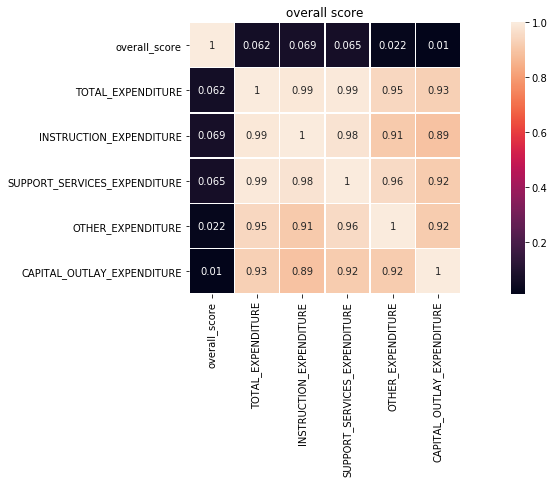

In [6]:
# correlation matrix

corrmat_overall = df[["overall_score", "TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE",
              "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]].corr()

plt.figure(figsize=(18,5))

sns.heatmap(corrmat_overall, square=True, annot=True, linewidths=.5)
plt.title("overall score")

plt.show()

Instruction expenditure is the most correlated with overall score, but the next top two variables are close behind, total expenditure and support services expenditures. All variables are highly correlated with each other.

---------------------------

3. Now, apply PCA to the 4 expenditure types. How much of the total variance is explained by the 1st component?

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df[["INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
                  "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]]

X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=1)
df["pca_1"] = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component.
 [0.94688927]


Over 94% of the total variance is explained by the first component.

------------------------

4. What is the correlation between the overall score variable and the 1st principal component?

In [9]:
df[["overall_score", "pca_1", "TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE",
              "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]].corr()

,overall_score,pca_1,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
overall_score,1.000000,0.043132,0.061849,0.068919,0.065197,0.022495,0.010373
pca_1,0.043132,1.000000,0.992928,0.973148,0.989059,0.972977,0.956879
TOTAL_EXPENDITURE,0.061849,0.992928,1.000000,0.991712,0.993579,0.948700,0.930022
INSTRUCTION_EXPENDITURE,0.068919,0.973148,0.991712,1.000000,0.977930,0.914349,0.894402
SUPPORT_SERVICES_EXPENDITURE,0.065197,0.989059,0.993579,0.977930,1.000000,0.955668,0.915003
OTHER_EXPENDITURE,0.022495,0.972977,0.948700,0.914349,0.955668,1.000000,0.916751
CAPITAL_OUTLAY_EXPENDITURE,0.010373,0.956879,0.930022,0.894402,0.915003,0.916751,1.000000


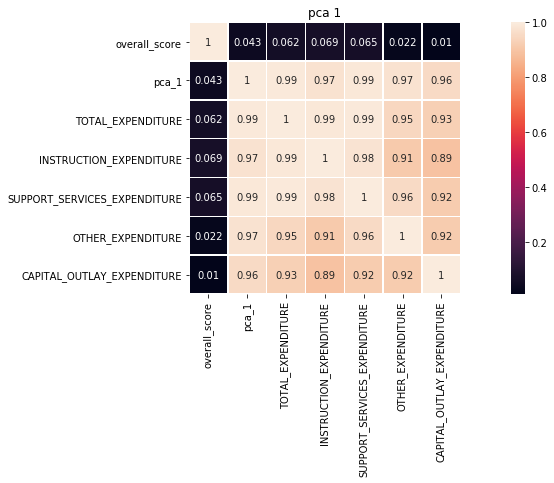

In [10]:
# correlation matrix

corrmat_pca_1 = df[["overall_score", "pca_1", "TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE",
              "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]].corr()

plt.figure(figsize=(18,5))

sns.heatmap(corrmat_pca_1, square=True, annot=True, linewidths=.5)
plt.title("pca 1")

plt.show()

----------------------

5. If you were to choose the best variables for your model, would you prefer using the 1st principal component instead of the expenditure variables? Why?

The first principal component is less correlated with overall score than three of the expenditure variables. However, the expenditure variables are all very highly correlated amongst each other. I'd opt not to use the first component, and instead create a new weighted variable combining the expenditure variables. Or simply use the instruction expenditure by itself.